## Digit Recognition (MNIST Dataset) using Logistic Regression

In [2]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [95]:
#Suppress Future warning form SciKit Learn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
#load the digits dataset
digits = load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

## Displaying the Images and Labels

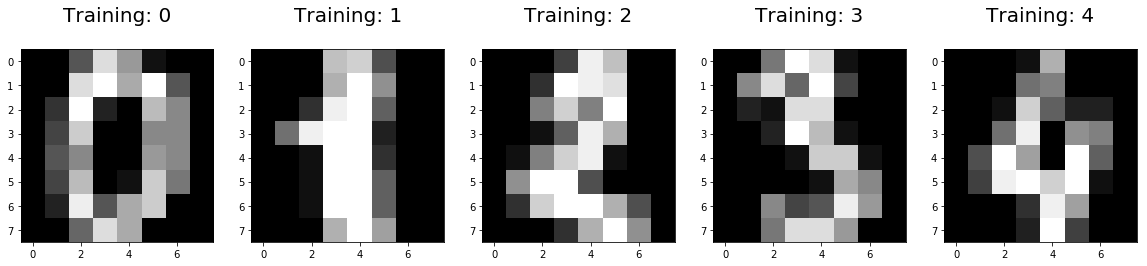

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [12]:
#import the Logistictic Regression Model
from sklearn.linear_model import LogisticRegression

In [13]:
#Create an instance of the Logistic regression model
logisticRegr = LogisticRegression()

In [17]:
#Train the data
#Note Sklearn will thrown a future warning message for version 0.22
#make sure to add the lines above suppress the warnings
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
#predict one image
predict_1 = logisticRegr.predict(X_test[0].reshape(1,-1))
predict_1

array([2])

In [21]:
#predict multiple observations
predict_mul = logisticRegr.predict(X_test[0:10])
predict_mul

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [23]:
#prdict the entire test data
predict = logisticRegr.predict(X_test)
predict

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 1, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 1, 4, 2, 1, 6, 9, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

## Measure the performance of the model

In [25]:
#using the score method to get the accuracy of the model
score = logisticRegr.score(X_test, y_test)
score

0.9533333333333334

## Uisng the Confusion Matrix

In [27]:
# to use the confusion matrix, make sure you import the metrics library
cm = metrics.confusion_matrix(y_test, predict)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 45,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score:0.9533333333333334')

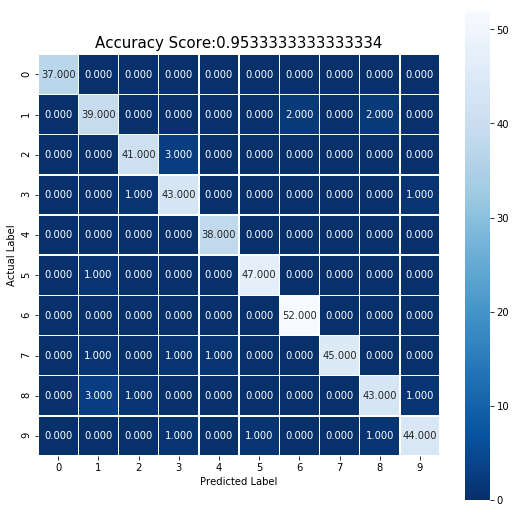

In [29]:
#plot the comfusion matrix using heatmap form seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title ='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

## Using the MNIST Dataset

In [37]:
import os
import struct
import gzip

In [38]:
def load_MNIST(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        
    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, dtype=np.uint8).reshape(len(labels), 784).astype(np.float64)
        
    return images, labels

In [42]:
X_train, y_train = load_MNIST('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [43]:
X_test, y_test = load_MNIST('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


## Image visualization of the digits

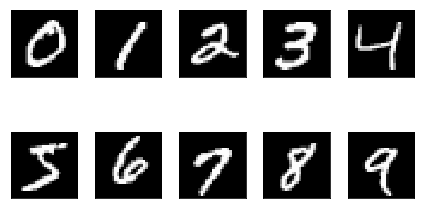

In [84]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax=ax.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28,28) #get all datapoints where the digit image is equal to i
    ax[i].imshow(img, cmap='gist_gray', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [50]:
X_train.shape

(60000, 784)

In [51]:
y_train.shape

(60000,)

## Visualize 25 Sample Image of digit 5

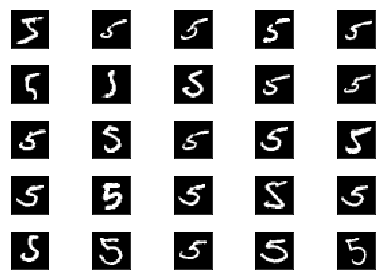

In [87]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='gist_gray', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

## Using Logistic Regression Model for Classification

#### Step1: Create an instance of the Logistic Regression Model

In [92]:
#set the solver to 'lbfgs'

MNIST_logres = LogisticRegression(solver='lbfgs')

#### Step2: Train the data


In [94]:
MNIST_logres.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

#### Step 3: Make a prediction using the test data

In [96]:
#take one sample label for checking
y_test[0]

7

In [99]:
#make sure to flatten the data by rehaping
MNIST_logres.predict(X_test[0].reshape(1,-1))

array([7], dtype=uint8)

In [100]:
#making multiple predictions
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [102]:
MNIST_logres.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

### Measuring the Accuracy of the Model

In [104]:
score = MNIST_logres.score(X_test, y_test)
score

0.918

### Getting the Confusion Matrix

In [105]:
#predict the entire test data set
prediction = MNIST_logres.predict(X_test)

In [106]:
#compute the confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[ 957,    0,    0,    4,    0,    3,    6,    2,    6,    2],
       [   0, 1116,    3,    1,    0,    1,    4,    1,    8,    1],
       [   8,   12,  905,   18,    9,    5,   10,   11,   51,    3],
       [   3,    0,   19,  915,    2,   22,    5,   11,   25,    8],
       [   1,    2,    4,    3,  911,    0,   12,    2,   10,   37],
       [  11,    2,    1,   34,   10,  763,   16,    7,   40,    8],
       [   7,    3,    7,    2,    4,   17,  910,    1,    7,    0],
       [   3,    6,   24,    4,    7,    1,    1,  945,    5,   32],
       [   9,   14,    7,   22,   11,   27,    7,   12,  854,   11],
       [   9,    6,    2,   13,   30,    4,    0,   25,   16,  904]],
      dtype=int64)

Text(0.5, 1.0, 'Accuracy Score:0.918')

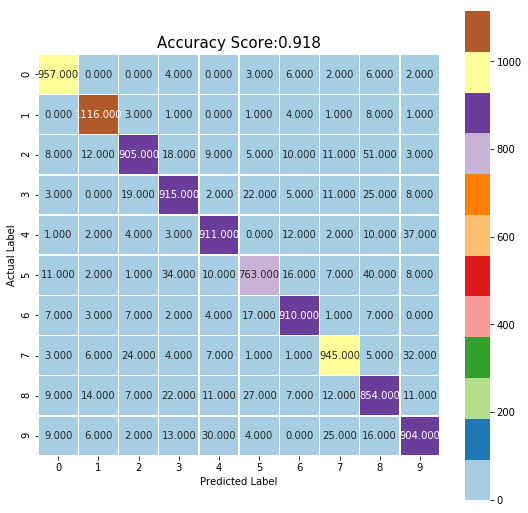

In [108]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Paired')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title ='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

### Displaying Misclassified Digit

In [111]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, prediction):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

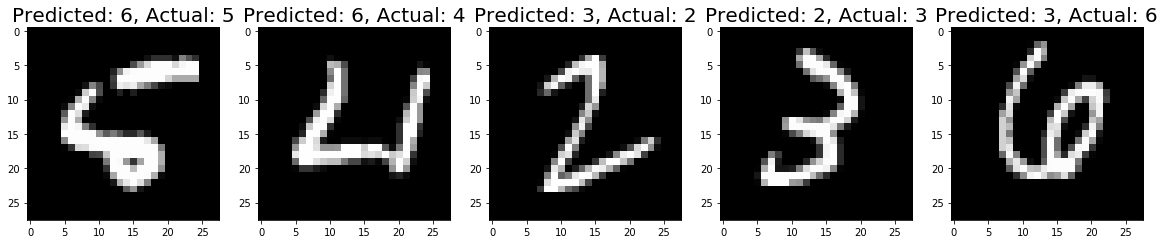

In [116]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(prediction[badIndex], y_test[badIndex]), fontsize = 20)